# Setup
preencha com os valores gerados para realizar a prova (obs: os ganhos na questçao 4 eram livres)

In [1]:
# Questão 01
Rq1 = 1000

# Questão 02
Va = 1
Vb = 10

#Questão 03
Rq3 = 10000

# questão 04
fcBaixa = 1000
fcAlta = 125000
G1 = 2
G2 = 5

In [2]:
import numpy as np
from engineering_notation import EngNumber
import matplotlib.pyplot as plt
from math import pi

# Questão 1

In [3]:
R = Rq1
vin = 10

VDivTens = [0,vin*1/(1+9),vin]

print(f'Divisor de tensão na entrada, valores: [{EngNumber(VDivTens[0])}, {EngNumber(VDivTens[1])}, {EngNumber(VDivTens[2])}]V')

# AmpOp1, Amplificador não inversor
print()
print('Amplificador não inversor')
vin1 = VDivTens[1] # divisor de tensão
R1 = 2*R 
Rf1 = R
Vo1 = (Rf1/R1 + 1) * vin1
print(f'Vin = {EngNumber(vin1)}')
print(f'R = {EngNumber(R1)}')
print(f'Rf = {EngNumber(Rf1)}')
print('Vo = (Rf/R + 1)*Vin')
print(f'Vo1 = {EngNumber(Vo1)}V')

# AmpOp2, Amplificador inversor
print()
print('Amplificador Inversor')

vin2 = VDivTens[2]
R2 = R 
Rf2 = 2*R
Vo2 = -(Rf2/R2) * vin2
print(f'Vin = {EngNumber(vin2)}')
print(f'R = {EngNumber(R2)}')
print(f'Rf = {EngNumber(Rf2)}')
print('Vo = -(Rf/R)*Vin')
print(f'Vo2 = {EngNumber(Vo2)}V')


# AmpOp3, Amplificador somador inversor
print()
print('Amplificador somador inversor')
vin3a = Vo2
vin3b = Vo1
R3a = 10 *R 
R3b = R
Rf3 = 20 * R
Vo3 = -Rf3* (vin3a/R3a + vin3b/R3b)

print(f'R1 = {EngNumber(R3a)}')
print(f'R2 = {EngNumber(R3b)}')
print(f'V1 = {EngNumber(vin3a)}')
print(f'V2 = {EngNumber(vin3b)}')
print(f'Rf = {EngNumber(Rf3)}')
print('Vo = -Rf * (V1/R1 + V2/R2)')
print(f'Vo3 = {EngNumber(Vo3)}V')

Divisor de tensão na entrada, valores: [0, 1, 10]V

Amplificador não inversor
Vin = 1
R = 2k
Rf = 1k
Vo = (Rf/R + 1)*Vin
Vo1 = 1.50V

Amplificador Inversor
Vin = 10
R = 1k
Rf = 2k
Vo = -(Rf/R)*Vin
Vo2 = -20V

Amplificador somador inversor
R1 = 10k
R2 = 1k
V1 = -20
V2 = 1.50
Rf = 20k
Vo = -Rf * (V1/R1 + V2/R2)
Vo3 = 10V


# Questão 2

In [4]:
VinMin = Va
VinMax = Vb

VoMax = 12
VoMin = 0

## a) Comprador inversor

In [5]:
R = 1e3 # escolha valor de R
Rf = ((VoMax - VoMin)/(VinMax - VinMin) - 1)*R
Vref = (-VoMin + VinMin*(1 + Rf/R))/ (Rf/R)

print(f'R  = {EngNumber(R)}')
print(f'Rf = {EngNumber(Rf)}')
print(f'Vref = {EngNumber(Vref)}V')

R  = 1k
Rf = 333.33
Vref = 4V


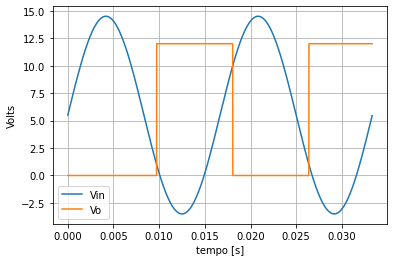

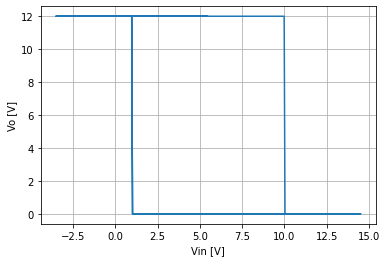

In [6]:
f = 60
t = np.arange(0, 2*1/f, (1/f)*1e-3)
A = (VinMax - VinMin)

vin_vetor = A * np.sin(2*pi*f*t)  + (VinMax + VinMin)/2
vo_vetor = np.zeros_like(vin_vetor)

Vo = 0
for i, vin in enumerate(vin_vetor):
    vp = (Vo - Vref) * R / (R + Rf) + Vref
    vn = vin
    if vp > vn:
        Vo = VoMax
    else:
        Vo = VoMin    
    vo_vetor[i] = Vo

plt.figure()

plt.plot(t,vin_vetor, label='Vin')
plt.plot(t,vo_vetor, label='Vo')
plt.xlabel('tempo [s]')
plt.ylabel('Volts')
plt.legend()
plt.grid()

plt.figure()
plt.plot (vin_vetor,vo_vetor)
plt.xlabel('Vin [V]')
plt.ylabel('Vo [V]')
plt.grid()
plt.show()

## b) comparador não inversor

In [7]:
R = R # escolha valor de R
Rf = ((VoMax - VoMin)/(VinMax - VinMin))*R
Vref = (VoMax - VinMin)*R/(R+Rf) + VinMin

print(f'R = {EngNumber(R)}')
print(f'Rf = {EngNumber(Rf)}')
print(f'Vref = {EngNumber(Vref)}V')

R = 1k
Rf = 1.33k
Vref = 5.71V


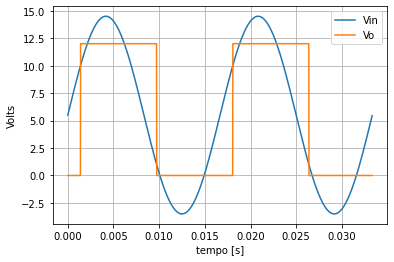

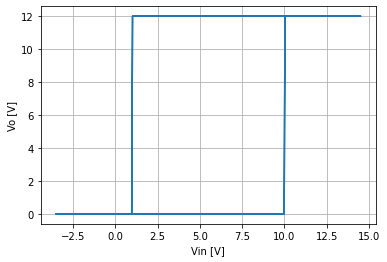

In [8]:
f = 60
t = np.arange(0, 2*1/f, (1/f)*1e-3)
A = (VinMax - VinMin)

vin_vetor = A * np.sin(2*pi*f*t)  + (VinMax + VinMin)/2
vo_vetor = np.zeros_like(vin_vetor)

Vo = 0
for i, vin in enumerate(vin_vetor):
    vp = (Vo - vin) * R / (R + Rf) + vin
    vn = Vref
    if vp > vn:
        Vo = VoMax
    else:
        Vo = VoMin    
    vo_vetor[i] = Vo

plt.figure()

plt.plot(t,vin_vetor, label='Vin')
plt.plot(t,vo_vetor, label='Vo')
plt.xlabel('tempo [s]')
plt.ylabel('Volts')
plt.legend()
plt.grid()

plt.figure()
plt.plot (vin_vetor,vo_vetor)
plt.xlabel('Vin [V]')
plt.ylabel('Vo [V]')
plt.grid()
plt.show()

# Questão 3
## a) 
o bit menos significativo é o da esquerda

## b)

In [9]:
# para descobrir a resolução, basta calcular para Vo = 3V, restante das fontes para 0V
# o circuito equivalente para este caso fica (valor da entrada não inversora):
# depois basta fazer o calculo da amplificação do Ampop (neste exercicio: amplificador não inversor vo = (rf/r + 1)*vin)
R = Rq3

Rth = R
Vth_A = 3/16 
Vth_F = 3/16 *  20000/(10000 + 20000) 


print(f'Vth (ch aberta) = {EngNumber(Vth_A)}V')
print(f'Vth (ch fechada) = {EngNumber(Vth_F)}V')

# calculo de vo

rf = 20000
r = 10000

Vo_A = (rf/r + 1) * Vth_A 
Vo_F = (rf/r + 1) * Vth_F

print('resoluções:')
print(f'\t Vo (ch aberta) = {EngNumber(Vo_A)}V')
print(f'\t Vo (ch fechada) = {EngNumber(Vo_F)}V')

Vth (ch aberta) = 187.50mV
Vth (ch fechada) = 125mV
resoluções:
	 Vo (ch aberta) = 562.50mV
	 Vo (ch fechada) = 375mV


## c)
conversor D/A chave aberta

In [10]:
for i in np.arange(0,16,1):
    print(f'{i}\t{Vo_A * i}') 

0	0.0
1	0.5625
2	1.125
3	1.6875
4	2.25
5	2.8125
6	3.375
7	3.9375
8	4.5
9	5.0625
10	5.625
11	6.1875
12	6.75
13	7.3125
14	7.875
15	8.4375


conversor D/A chave fechada

In [11]:
print('\n conversor D/A chave fechada')
for i in np.arange(0,16,1):
    print(f'{i}\t{Vo_F * i}')


 conversor D/A chave fechada
0	0.0
1	0.375
2	0.75
3	1.125
4	1.5
5	1.875
6	2.25
7	2.625
8	3.0
9	3.375
10	3.75
11	4.125
12	4.5
13	4.875
14	5.25
15	5.625


# Questão 4
Obs: valores não comerciais

In [15]:
def compFiltro(fc):
    C = 10/fc*10e-6
    R = 1/(2*pi*fc*C)
    return R, C

#circuito (1)
fc1 = fcBaixa
Rpa, Cpa = compFiltro(fc1)
Rf = G1 * Rpa
R = Rf/(G1-1)

print()
print(f'passa alta: R = {EngNumber(Rpa)}, C = {EngNumber(Cpa)}')
print(f'Rf = {EngNumber(Rf)}')
print(f'R = {EngNumber(R)}')

#circuito (2)
fc2 = fcAlta
Rpb, Cpb = compFiltro(fc2)
Rf = G1 * Rpb
R = Rf/(G2-1)

print(f'passa baixa: R = {EngNumber(Rpb)}, C = {EngNumber(Cpb)}')
print(f'Rf = {EngNumber(Rf)}')
print(f'R = {EngNumber(R)}')




passa alta: R = 1.59k, C = 100n
Rf = 3.18k
R = 3.18k
passa baixa: R = 1.59k, C = 800p
Rf = 3.18k
R = 795.77
